# Лабораторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

#### Ответы
1. В какой шкале представлены все признаки в наборе?<br>
checking_status    - порядковая (качественный признак) <br>
duration           - абсолютная(количественный признак)<br>
credit_history     - номинальная(качественный признак)<br> 
purpose            - номинальная(качественный признак)<br>
credit_amount      - абсолютная(количественный признак)<br> 
savings_status     - номинальная(качественный признак)<br>
employment         - порядковая(качественный признак)<br>
personal_status    - номинальная(качественный признак)<br>
property_magnitude - номинальная(качественный признак)<br>
age                - абсолютная(количественный признак)<br>
housing            - номинальная(качественный признак)<br>
existing_credits   - абсолютная(количественный признак)<br>
job                - номинальная(качественный признак)<br>
num_dependents     - абсолютная (количественный признак)<br>
foreign_worker     - номинальная(бинарный признак)<br>
class              - номинальная(бинарный признак)<br>
<br>
2. Укажите признак с наименьшей дисперсией.<br>
num_dependents<br><br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
credit_amount<br><br>
4. В каком классе больше всего skilled работников?<br>
good (232)<br><br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
В credit_amount есть выбросы (гигантские кредиты), но скорее всего это особенность данных.<br>
Но забавляет самоуверенность людей, которые просят на radio/tv 10961.0 баксов...<br><br>
6. Сколько пропущенных значений в наборе?<br>
checking_status    -    194<br>
savings_status     -     88<br>
housing            -     27<br>
<br>
7. Попытайтесь заполнить пропущенные значения.<br>
credit_df.fillna('Unknown').head()<br><br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>


9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
- небольшие кредиты берут на короткий срок. На длительный срок почти нет маленьких кредитов.<br>
- с возрастом в среднем снижается число клиентов, берущих кредиты на крупные суммы.
<br><br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
Имеет смысл стандартизировать признаки checking_status и employment, потому что они обозначают числовые интервалы разных размеров, а хранятся в виде строк. Ассоциировав их со значениями на отрезке [0;1], можно легко задать им отношение порядка. + это даст возможность использовать их в алгоритмах, требующих нормализации/стандартизации.
Можно было бы стандартизировать duration, т.к. у него скорее всего есть какое-то определённое максимальное и минимальное значение, но я бы не стала этого делать, оптому что для расчёта возможнсти оплатить клиентом этот кредит наверняка в том числе будет использоваться какая-нибудь экономическая формула, для которой нужно именно число месяцев.
<br><br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>
Самым очевидным вариантом кажется зарплата на настоящий момент, но видимо есть ограничение на распространение этой информации, поэтому можно попробовать собрать город проживания. (в Мск и в Нижневартовске кредит на 10к вообще не одно и то же). 
Наличие кредитов у ближайших родственников? Если доход общий, то это может быть проблемой.

In [48]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install sklearn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [3]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad


In [4]:
credit_df.shape

(501, 16)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     501 non-null    object 
 1   duration            501 non-null    float64
 2   credit_history      501 non-null    object 
 3   purpose             501 non-null    object 
 4   credit_amount       501 non-null    float64
 5   savings_status      501 non-null    object 
 6   employment          501 non-null    object 
 7   personal_status     501 non-null    object 
 8   property_magnitude  501 non-null    object 
 9   age                 501 non-null    float64
 10  housing             474 non-null    object 
 11  existing_credits    501 non-null    float64
 12  job                 501 non-null    object 
 13  num_dependents      501 non-null    float64
 14  foreign_worker      501 non-null    object 
 15  class               501 non-null    object 
dtypes: float

In [6]:
credit_df.describe()
#наименьшая дисперсия (std*std) у num_dependents 

,duration,credit_amount,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000
mean,20.315,3344.756,35.605,1.393,1.144
std,12.103,5154.839,11.740,0.568,0.351
min,4.000,0.000,15.000,1.000,1.000
25%,12.000,1288.000,27.000,1.000,1.000
50%,18.000,2197.000,33.000,1.000,1.000
75%,24.000,3915.000,42.000,2.000,1.000
max,60.000,100042.000,89.000,4.000,2.000


In [7]:
credit_df.groupby('class').mean()
#у credit_amount наибольная разница для классов

,duration,credit_amount,age,existing_credits,num_dependents
class,,,,,
bad,25.255,4806.358,35.029,1.380,1.153
good,18.456,2794.648,35.821,1.398,1.140


In [8]:
credit_df[credit_df['job']=='skilled'].groupby('class').job.count()
# скилловых больше в good - 232

class
bad      80
good    232
Name: job, dtype: int64

## Определение шкал признаков и поиск NaN

In [9]:
credit_df.checking_status.value_counts()
#checking_status - порядковая шкала
#Nan = no checking
#зачем "0" отдельно???

no checking    194
0<=X<200       142
<0             129
>=200           31
0                5
Name: checking_status, dtype: int64

In [10]:
credit_df['checking_status'] = credit_df['checking_status'].replace('no checking', np.NaN)

In [11]:
credit_df.credit_history.value_counts()
#credit_history - номинальная шкала
#non-null

existing paid                     269
critical/other existing credit    149
delayed previously                 46
no credits/all paid                21
all paid                           16
Name: credit_history, dtype: int64

In [12]:
credit_df.purpose.value_counts()
#purpose - номинальная шкала
#non-null 

radio/tv               139
new car                105
furniture/equipment     98
not applicable          51
used car                51
education               25
repairs                 12
other                    8
domestic appliance       6
retraining               6
Name: purpose, dtype: int64

In [13]:
credit_df.savings_status.value_counts()
#savings_status - порядковая шкала
#Nan = no known savings

<100                302
no known savings     88
100<=X<500           49
500<=X<1000          33
>=1000               29
Name: savings_status, dtype: int64

In [14]:
credit_df['savings_status'] = credit_df['savings_status'].replace('no known savings', np.NaN)

In [15]:
credit_df.employment.value_counts()
#employment - порядковая шкала
#non-null  

1<=X<4        174
>=7           129
4<=X<7         84
<1             80
unemployed     34
Name: employment, dtype: int64

In [16]:
credit_df.personal_status.value_counts()
#personal_status - номинальная
#non-null  

male single           275
female div/dep/mar    153
male mar/wid           48
male div/sep           25
Name: personal_status, dtype: int64

In [17]:
credit_df.property_magnitude.value_counts()
#property_magnitude - номинальная шкала
#non-null  

car                  173
real estate          147
life insurance       103
no known property     78
Name: property_magnitude, dtype: int64

In [18]:
credit_df.housing.value_counts()
#housing - номинальная шкала
#Nan = Nan

own         342
rent         82
for free     50
Name: housing, dtype: int64

In [19]:
credit_df.job.value_counts()
#personal_status - номинальная шкала
#non-null  

skilled                      312
unskilled resident            96
high qualif/self emp/mgmt     82
unemp/unskilled non res       11
Name: job, dtype: int64

In [20]:
credit_df.foreign_worker.value_counts()
#personal_status - номинальная шкала (true/false)
#non-null  

yes    479
no      22
Name: foreign_worker, dtype: int64

In [21]:
credit_df['class'].value_counts()
#class - номианльная шкала (true/false)
#non-null  

good    364
bad     137
Name: class, dtype: int64

In [22]:
credit_df.existing_credits.value_counts()
#existing_credits - абсолютная шкала
#non-null  

1.0    323
2.0    161
3.0     15
4.0      2
Name: existing_credits, dtype: int64

In [23]:
credit_df.num_dependents.value_counts()
#num_dependents - абсолютная шкала
#non-null  

1.0    429
2.0     72
Name: num_dependents, dtype: int64

In [24]:
credit_df.isnull().sum()

checking_status       194
duration                0
credit_history          0
purpose                 0
credit_amount           0
savings_status         88
employment              0
personal_status         0
property_magnitude      0
age                     0
housing                27
existing_credits        0
job                     0
num_dependents          0
foreign_worker          0
class                   0
dtype: int64

## Поиск выбросов

<AxesSubplot:>

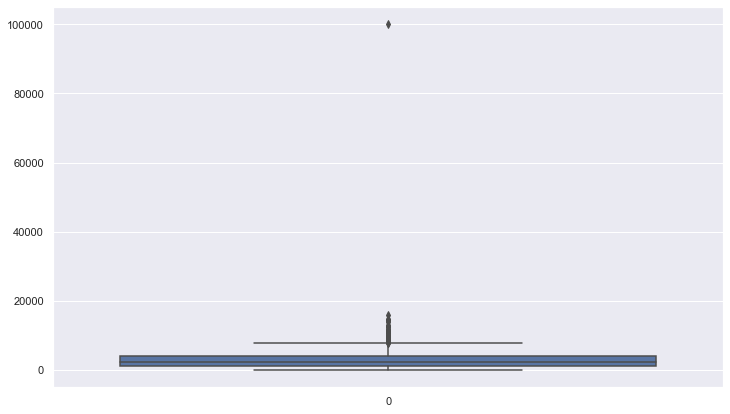

In [44]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df.credit_amount)

In [30]:
credit_df[credit_df['credit_amount']>credit_df.credit_amount.quantile(0.95)].head(10)
# в принципе никто не запрещал этим людям подать заявку на кредит на большую сумму

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class,credit_amount_fixed
18,0<=X<200,24.0,existing paid,used car,12579.0,<100,>=7,female div/dep/mar,no known property,44.0,for free,1.0,high qualif/self emp/mgmt,1.0,yes,bad,9055.0
57,NaN,36.0,critical/other existing credit,radio/tv,9566.0,<100,1<=X<4,female div/dep/mar,car,31.0,own,2.0,skilled,1.0,yes,good,9055.0
63,0<=X<200,48.0,no credits/all paid,not applicable,14421.0,<100,1<=X<4,male single,car,25.0,own,1.0,skilled,1.0,yes,bad,9055.0
78,NaN,54.0,no credits/all paid,used car,9436.0,NaN,1<=X<4,male single,life insurance,39.0,own,1.0,unskilled resident,2.0,yes,good,9055.0
87,0<=X<200,36.0,existing paid,education,12612.0,100<=X<500,1<=X<4,male single,no known property,47.0,for free,1.0,skilled,2.0,yes,bad,9055.0
95,0<=X<200,54.0,no credits/all paid,not applicable,15945.0,<100,<1,male single,no known property,58.0,rent,1.0,skilled,1.0,yes,bad,9055.0
105,0<=X<200,24.0,critical/other existing credit,other,11938.0,<100,1<=X<4,male single,car,39.0,own,2.0,high qualif/self emp/mgmt,2.0,yes,bad,9055.0
134,NaN,60.0,existing paid,radio/tv,10144.0,100<=X<500,4<=X<7,female div/dep/mar,real estate,21.0,own,1.0,skilled,1.0,yes,good,9055.0
180,NaN,36.0,delayed previously,not applicable,9572.0,<100,<1,male div/sep,car,28.0,own,2.0,skilled,1.0,yes,bad,9055.0
205,<0,30.0,critical/other existing credit,used car,10623.0,<100,>=7,male single,no known property,38.0,for free,3.0,high qualif/self emp/mgmt,2.0,yes,good,9055.0


<AxesSubplot:>

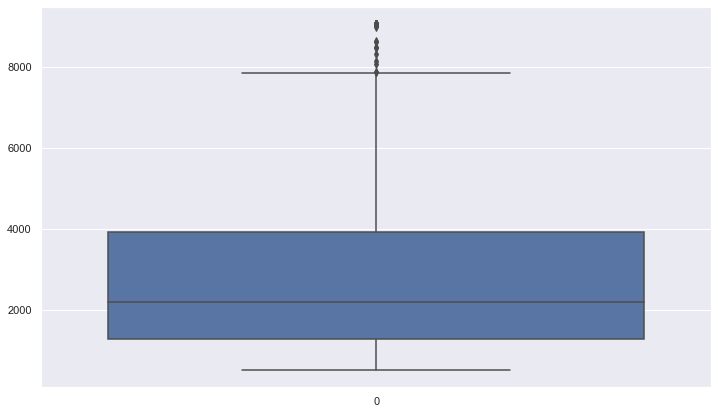

In [43]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df.credit_amount.clip(lower=credit_df.credit_amount.quantile(0.05), 
                                                  upper=credit_df.credit_amount.quantile(0.95)))

<AxesSubplot:>

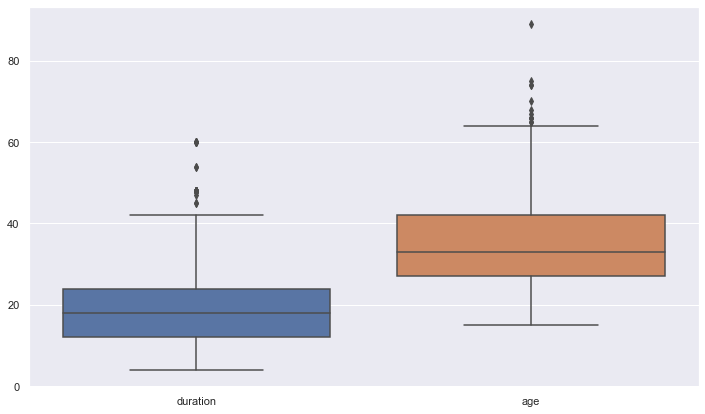

In [32]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=credit_df[['duration','age']])

## Замена пропущенных значений на Unknown

In [33]:
credit_df = credit_df.fillna('Unknown')

## Диаграммы для всех типов признаков

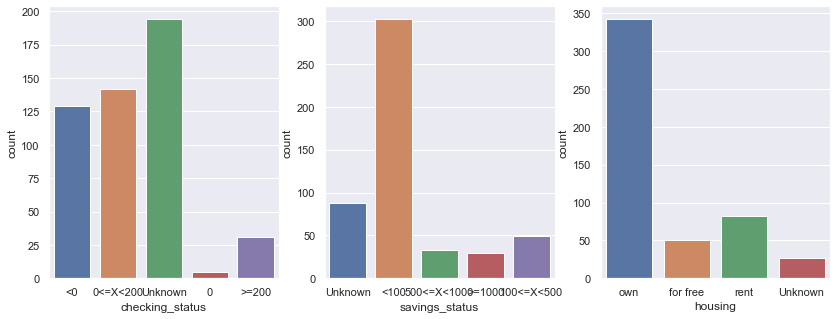

In [34]:
#качественные
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.countplot(x='checking_status', data=credit_df, ax=axes[0]);
sns.countplot(x='savings_status', data=credit_df, ax=axes[1]);
sns.countplot(x='housing', data=credit_df, ax=axes[2]);

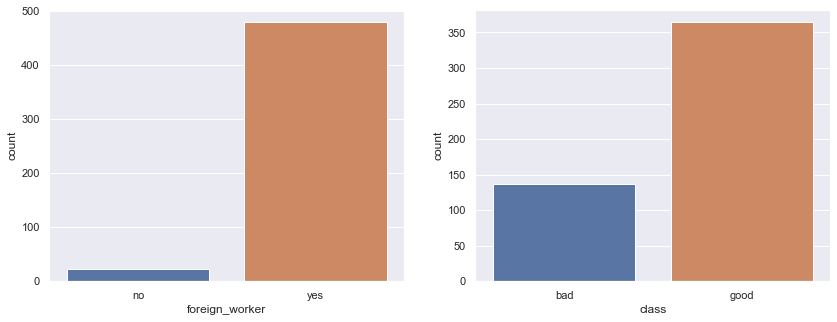

In [49]:
#бинарные
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='foreign_worker', data=credit_df, ax=axes[0]);
sns.countplot(x='class', data=credit_df, ax=axes[1]);

In [ ]:
# количественный
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                   figsize=(10, 4), sharex=False)

## Scatter-plot матрица и тепловая карта корреляций

In [35]:
# ОЧИСТКА ДАННЫХ
# замена объектного типа на категориальный
for i in credit_df:
    if(credit_df[i].dtypes == object):
         credit_df[i] = credit_df[i].astype('category')

            
cat_list = credit_df.select_dtypes(include='category').columns.to_list()
cat_list


new_cat = [i for i in cat_list if i in ["foreign_worker", "class"]]
new_cat

['foreign_worker', 'class']

In [36]:
great_list = []
for i in new_cat:
  new_list = credit_df[i].unique().to_list()
  great_list.append(new_list)

great_list

[['yes', 'no'], ['good', 'bad']]

In [37]:
count = 0
for i in new_cat:
    credit_df[i+'_num'] = np.where(credit_df[i] == great_list[count][0], 0, 1)
    count += 1

In [38]:
new_df = credit_df

for i in cat_list:
    print(i);
    if i not in ["foreign_worker", "class"] and credit_df[i].dtypes == 'category': 
        clearing_df = pd.get_dummies(credit_df[i])
        new_df = pd.merge(new_df, clearing_df, right_index=True, left_index=True)


checking_status
credit_history
purpose
savings_status
employment
personal_status
property_magnitude
housing
job
foreign_worker
class


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   checking_status                 501 non-null    category
 1   duration                        501 non-null    float64 
 2   credit_history                  501 non-null    category
 3   purpose                         501 non-null    category
 4   credit_amount                   501 non-null    float64 
 5   savings_status                  501 non-null    category
 6   employment                      501 non-null    category
 7   personal_status                 501 non-null    category
 8   property_magnitude              501 non-null    category
 9   age                             501 non-null    float64 
 10  housing                         501 non-null    category
 11  existing_credits                501 non-null    float64 
 12  job                   

In [40]:
df_new = new_df.select_dtypes(include=np.number)
df_new.head()

,duration,credit_amount,age,existing_credits,num_dependents,credit_amount_fixed,foreign_worker_num,class_num,0,0<=X<200,...,no known property,real estate,Unknown,for free,own,rent,high qualif/self emp/mgmt,skilled,unemp/unskilled non res,unskilled resident
0,6.0,1169.0,67.0,2.0,1.0,1169.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,48.0,5951.0,22.0,1.0,1.0,5951.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,12.0,2096.0,49.0,1.0,2.0,2096.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,42.0,7882.0,45.0,1.0,2.0,7882.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,24.0,4870.0,53.0,2.0,2.0,4870.0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration                        501 non-null    float64
 1   credit_amount                   501 non-null    float64
 2   age                             501 non-null    float64
 3   existing_credits                501 non-null    float64
 4   num_dependents                  501 non-null    float64
 5   credit_amount_fixed             501 non-null    float64
 6   foreign_worker_num              501 non-null    int64  
 7   class_num                       501 non-null    int64  
 8   0                               501 non-null    uint8  
 9   0<=X<200                        501 non-null    uint8  
 10  <0                              501 non-null    uint8  
 11  >=200                           501 non-null    uint8  
 12  Unknown_x                       501 

<AxesSubplot:>

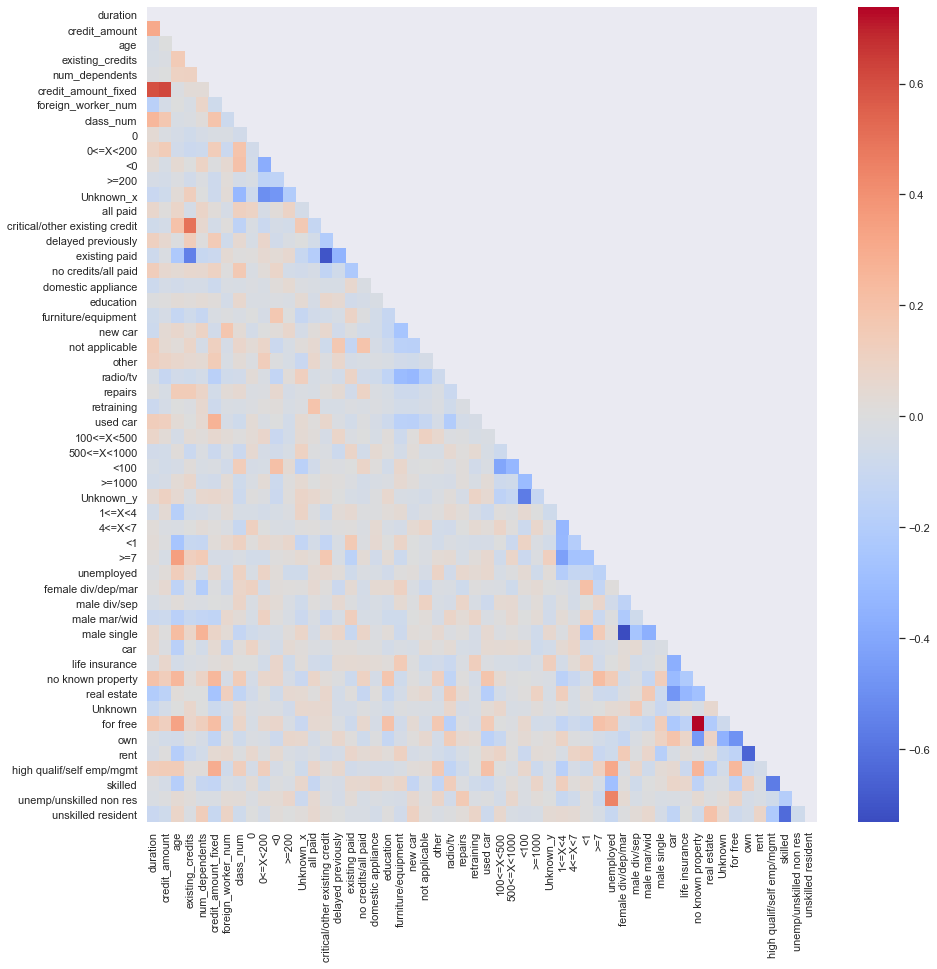

In [42]:
# Увеличение размера
fig, ax = plt.subplots(figsize=(15,15))

mask = np.triu(df_new.corr())

sns.heatmap(df_new.corr(), cmap= 'coolwarm', mask=mask)

#j = 0
#for i in credit_df.personal_status_num:
#    print(credit_df.personal_status[j], i)
#    j+=1

In [42]:
# ЧЕСГРЯ, тяжело увидеть зависимости 
# 1. люди без собственности живут "for free" (логично)
# 2. больше всего кредит хотят взять самозанятые/высококвалифицированные "бездомные" (возможно стоит почистить данные)
# 3. похоже, что неопытные ребята в основном хотят взять кредит на новую машину и переобучение

In [48]:
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class,credit_amount_fixed,foreign_worker_num,class_num
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,Unknown,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good,1169.0,0,0
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad,5951.0,0,1
2,Unknown,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good,2096.0,0,0
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good,7882.0,0,0
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad,4870.0,0,1


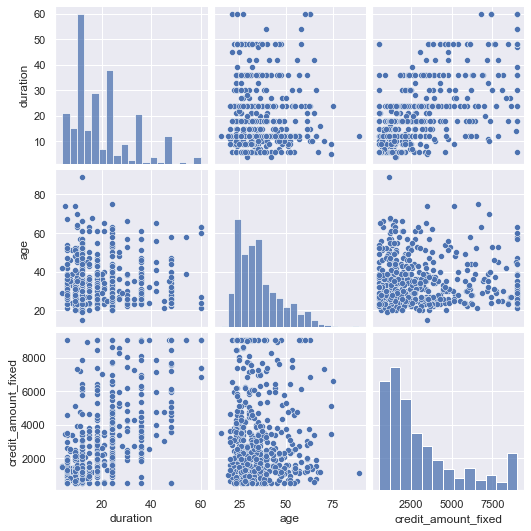

In [47]:
num_columns = list(set(['credit_amount_fixed','age','duration']))
sns.pairplot(credit_df[num_columns])
#небольшие кредиты берут на короткий срок. На длительный срок почти нет маленьких кредитов.
#с возрастом в среднем снижается число клиентов, берущих кредиты на крупные суммы